In [1]:
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
meta_activity_map_file = "../data/meta_activity_map.csv"
save_dir = "../data/activity_map"
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
meta_df = pd.read_csv(meta_activity_map_file)

In [24]:
def plot_diff_activity_map(plot_df, libn, save_file, padj_thresh=0.05):
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    plot_df[f"{libn}_padj"] = plot_df[f"{libn}_padj"].fillna(1.)
    sns.lineplot(data=plot_df, x=plot_df.index, y="CC", ax=axes, linewidth=3.5, alpha=0.75, color="#1e61a5")

    size_list = -np.log(plot_df[f"{libn}_padj"])/20
    style_list = [] 
    for lfc, padj in zip(plot_df[f"{libn}_log2FoldChange"], plot_df[f"{libn}_padj"]):
        if (lfc>0 and padj<padj_thresh):
            style_list.append("induced")
        elif (lfc<0 and padj<padj_thresh):
            style_list.append("repressed")
        else:
            style_list.append("unresponsive")
    sns.scatterplot(    
        data=plot_df, x=plot_df.index, y=libn, ax=axes, 
        size=size_list, 
        hue=style_list, hue_order=["unresponsive", "induced",  "repressed"], palette={"induced": "darkgreen", "repressed": "#ab162a", "unresponsive": "grey"},
        style=style_list, style_order=["unresponsive", "induced",  "repressed"], markers={"induced": "^", "repressed": "v", "unresponsive": "o"}, 
        legend=False, rasterized=True)
    # no x tick labels
    axes.set_xticks([])
    axes.set_xticklabels([])
    # y label ticks needed
    axes.yaxis.set_tick_params(width=2, length=5, which="major")
    axes.yaxis.get_label().set_visible(False)
    axes.set_title(libn)
    axes.yaxis.set_major_locator(MultipleLocator(2))
    # draw a line at 
    axes.axhline(0, color ='black', lw = 2, alpha = 0.5)
    # remove spines
    axes.spines[["right", "top", "bottom"]].set_visible(False)
    save_pdf(save_file, fig)
    return

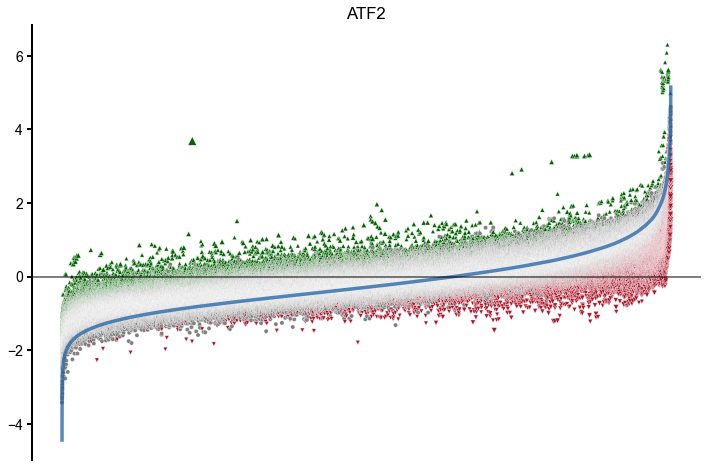

In [25]:
for lib in libraries[1:2]:
    save_file = os.path.join(save_dir, f"{lib}_activity_map.pdf")
    plot_diff_activity_map(meta_df, lib, save_file)

In [11]:
color_dict = {
    "blue": "#1e61a5",
    "red": "#ab162a",
}